In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd
import seaborn as sns
import numpy as np

This dataset contains estimates and projections of greenhouse gas emissions in Delaware:

In [2]:
emissions = pd.read_csv("Delaware_Greenhouse_Gas_Emissions.csv").dropna()
amount = 'MMTCO2e'
emissions

,Year,Category,Economic sectors,Source,Type,Fuel type,Gas,MMTCO2e
0,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Coal,CO2,5.024909
1,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Petroleum,CO2,1.852352
2,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Natural Gas,CO2,0.611201
3,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Coal,N2O,0.023957
4,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Petroleum,N2O,0.003870
...,...,...,...,...,...,...,...,...
4312,2050,Projection,Commercial,Fossil Fuel Combustion,Energy,Wood,N2O,0.000025
4313,2050,Projection,Commercial,Fossil Fuel Combustion,Energy,Coal,CH4,0.000000
4314,2050,Projection,Commercial,Fossil Fuel Combustion,Energy,Petroleum,CH4,0.001113
4315,2050,Projection,Commercial,Fossil Fuel Combustion,Energy,Natural Gas,CH4,0.002349


## 1.
(1.6) Let `co2` be the frame resulting from selection of the rows in which *Category* is `'Estimate'` and *Gas* is `'CO2'`.

In [4]:
co2 = None

co2 = emissions[(emissions['Category'] == 'Estimate') & (emissions['Gas'] == 'CO2')]

co2

,Year,Category,Economic sectors,Source,Type,Fuel type,Gas,MMTCO2e
0,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Coal,CO2,5.024909
1,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Petroleum,CO2,1.852352
2,1990,Estimate,Electric power,Fossil Fuel Combustion,Energy,Natural Gas,CO2,0.611201
13,1990,Estimate,Transportation,Fossil Fuel Combustion,Energy,Petroleum,CO2,4.531621
14,1990,Estimate,Transportation,Fossil Fuel Combustion,Energy,Natural Gas,CO2,0.000000
...,...,...,...,...,...,...,...,...
2025,2018,Estimate,Residential,Fossil Fuel Combustion,Energy,Petroleum,CO2,0.365074
2026,2018,Estimate,Residential,Fossil Fuel Combustion,Energy,Natural Gas,CO2,0.668757
2036,2018,Estimate,Commercial,Fossil Fuel Combustion,Energy,Coal,CO2,0.000000
2037,2018,Estimate,Commercial,Fossil Fuel Combustion,Energy,Petroleum,CO2,0.240642


In [5]:
# TESTS
assert type(co2) == pd.DataFrame, "co2 should be a DataFrame"
assert co2.shape == (406,8), "co2 should be 406 by 8"
assert all( co2["Category"]=="Estimate" ), "All rows in co2 should have Category=Estimate"
assert all( co2["Gas"]=="CO2" ), "All rows in co2 should have Gas=CO2"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete

## 2.
(2.3) Make a box plot of *MMTCO2e* from `co2`, putting *Economic sectors* on the y axis and separating facet columns according to *Fuel type*.

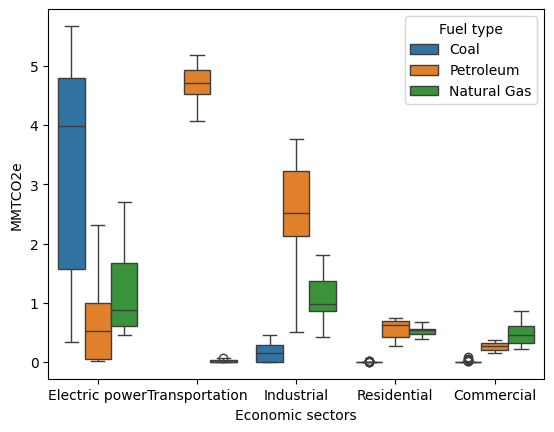

In [6]:
sns.boxplot(data=co2, x='Economic sectors', y=amount, hue='Fuel type')
sns.set(rc={'figure.figsize':(12, 6)})

## 3.
(2.5) Make line plots from `co2` with *Year* on the x axis, *MMTCO2e* on the y axis, colors for *Economic sectors*, and columns for *Fuel type*. (There will be no error bars/ribbons on these.)

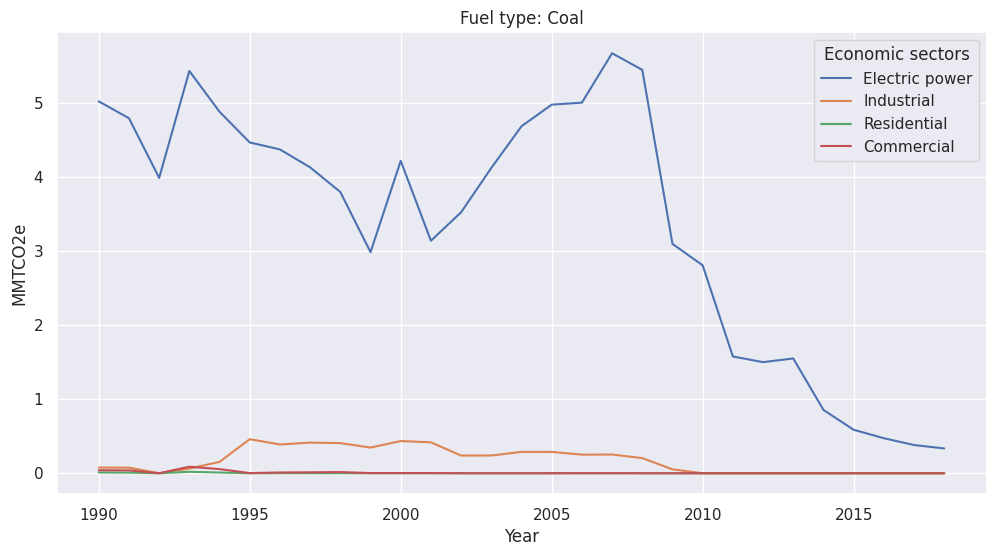

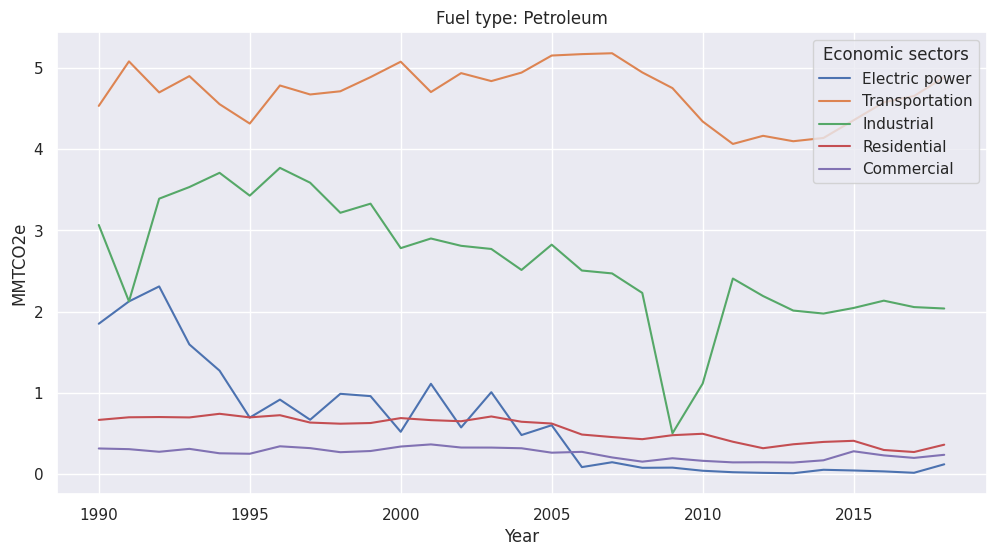

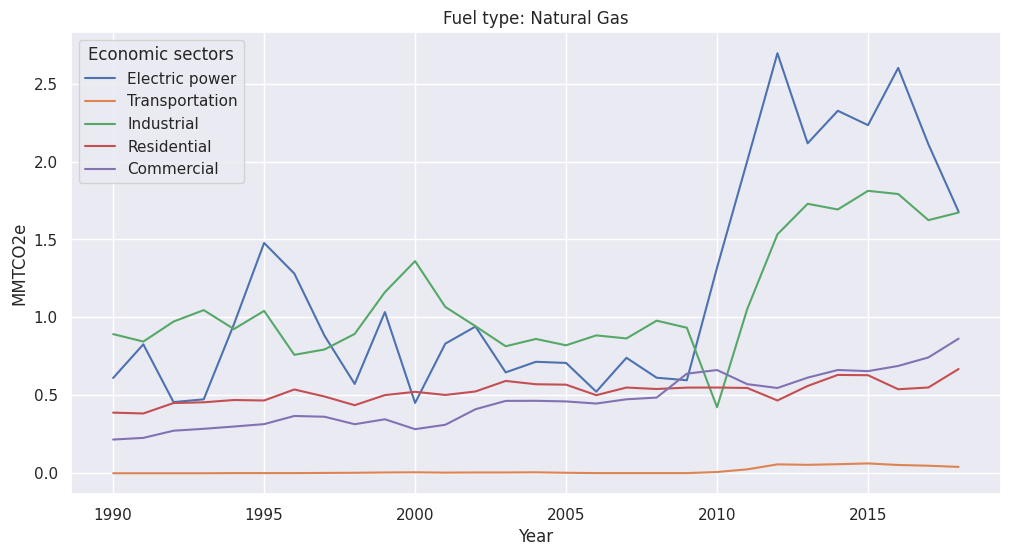

In [ ]:
import matplotlib.pyplot as plt

fuel_types = co2['Fuel type'].unique()

plt.figure(figsize=(12, 6))

for fuel in fuel_types:
    fuel_data = co2[co2['Fuel type'] == fuel]
    
    sns.lineplot(data=fuel_data, x='Year', y=amount, hue='Economic sectors', legend='full')
    
    plt.title(f'Fuel type: {fuel}')
    
    plt.show()


## 4.
(2.6) Here is the correlation between *Year* and emissions of CO2 from `co2`:

In [10]:
co2[["Year", "MMTCO2e"]].corr()
correlation = co2[['Year', amount]].corr()

correlation

,Year,MMTCO2e
Year,1.000000,-0.088188
MMTCO2e,-0.088188,1.000000


Let `sectorCorr` be the same result but with the correlations grouped by *Economic sectors*. 

In [ ]:
sectorCorr = co2.groupby('Economic sectors')[['Year', amount]].corr()

sectorCorr = sectorCorr.reset_index()

print(sectorCorr.columns)

sectorCorr.columns = ['Economic sectors', 'Variable', 'Correlation', 'Temp']
sectorCorr = sectorCorr.drop(columns='Temp')

sectorCorr = sectorCorr.pivot_table(index=['Economic sectors'], columns=['Variable'], values='Correlation')

sectorCorr

Index(['Economic sectors', 'level_1', 'Year', 'MMTCO2e'], dtype='object')


Variable,MMTCO2e,Year
Economic sectors,,
Commercial,0.164500,1.0
Electric power,-0.285671,1.0
Industrial,-0.114945,1.0
Residential,-0.106785,1.0
Transportation,-0.017885,1.0


In [17]:
# TESTS
assert type(sectorCorr) == pd.DataFrame, "sectorCorr should be a DataFrame"
assert sectorCorr.shape == (10,2), "sectorCorr should be 10 by 2"
assert sectorCorr.loc[("Commercial","Year"),"MMTCO2e"] > 0, "Correlation between Year and MMTCO2e for Commercial should be positive"
assert sectorCorr.loc[("Electric power","Year"),"MMTCO2e"] < 0, "Correlation between Year and MMTCO2e for Electric power should be negative"
print("OK")

AssertionError: sectorCorr should be 10 by 2

In [ ]:
# Intentionally blank--do not delete